## <font style="color:lightblue"> Decision tree
Consider data from file suv.csv

<font style="color:lightblue">0) Read the data into a pandas dataframe.


In [143]:
import pandas as pd
df = pd.read_csv('suv.csv', delimiter=',', skiprows=0)
df.keys()

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [157]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0



<font style="color:lightblue">1) Pick Age and Estimated Salary as the features and Purchased as the target variable.


In [159]:
features = df[['Age','EstimatedSalary']]
target = df['Purchased']

<font style="color:lightblue"> Convert categorical variables to dummy numerical values

In [158]:
corr = pd.get_dummies(df, columns=['Gender']).corr()
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


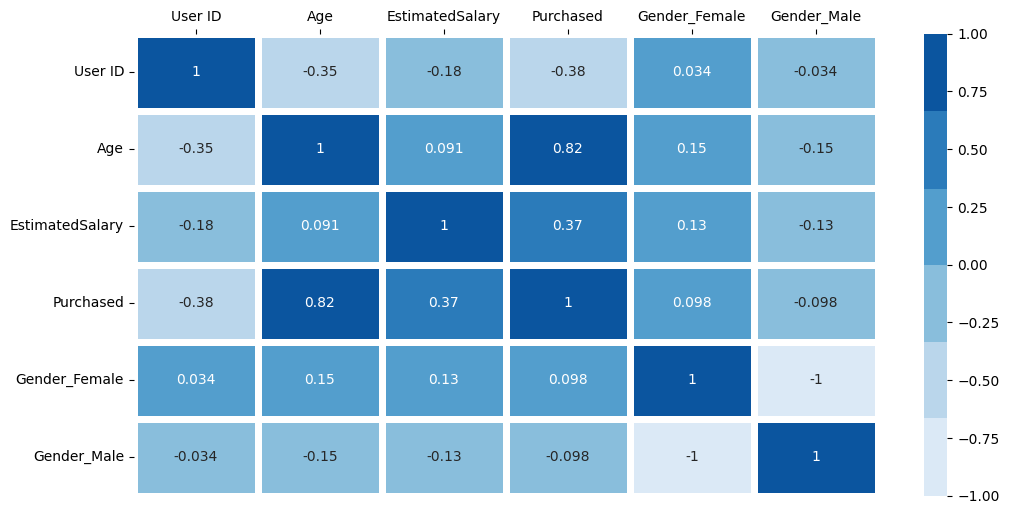

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.color_palette('Blues')

f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(corr.corr(),
             annot=True, 
             vmax= 1, vmin= -1, 
             center= 0, linewidth=5, 
             cmap=cmap, ax=ax).xaxis.tick_top()
plt.show()


<font style="color:lightblue">2) Split the data into training and testing sets with 80/20 ratio.


In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20,random_state=42)



<font style="color:lightblue">3) Scale the features using standard scaler.


In [151]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# X_train_std
# X_test_std


<font style="color:lightblue">4) Train a decision tree classifier with entropy criterion and predict on test set.


In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

def train(with_criterion):
  classifier = DecisionTreeClassifier(criterion=with_criterion, random_state=42)
  classifier.fit(X_train_std, y_train)
  y_pred = classifier.predict(X_test_std)

  print('='*60)
  print(f'{with_criterion.upper()}')
  print('confusion_matrix:\n', confusion_matrix(y_test, y_pred))
  print('classification_report:\n', classification_report(y_test, y_pred))


<font style="color:lightblue">5) Print the confusion matrix and the classification report.


In [154]:
train('entropy')

ENTROPY
confusion_matrix:
 [[46  6]
 [ 7 21]]
classification_report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88        52
           1       0.78      0.75      0.76        28

    accuracy                           0.84        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80




<font style="color:lightblue">6) Repeat steps 4 and 5 with the gini criterion.


In [155]:
train('gini')

GINI
confusion_matrix:
 [[46  6]
 [ 7 21]]
classification_report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88        52
           1       0.78      0.75      0.76        28

    accuracy                           0.84        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80




<font style="color:lightblue">7) Discuss the performance of your models.

Trained decision tree classifier with Entropy and Gini, received same scores.

      - Higher performance on class 0 = [precision:0.87, recall:0.88, f1-score:0.88, support:52]
      - Lower performance on Class 1 = [precision:0.78, recall:0.75, f1-score:0.76, support:28]

In [161]:
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
Female    204
Male      196
Name: count, dtype: int64

<font style="color:lightblue">The classes are imbalanced as class 1 = [support:28] compared to class 0 = [support:52]
Considering 'suv.csv' [User ID,Gender,Age,EstimatedSalary,Purchased] there is a difference in the number of instances in gender[males: 196, females: 204] in the dataset.
Further optimization involving, taking into account both male and female instances.